In [3]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [4]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

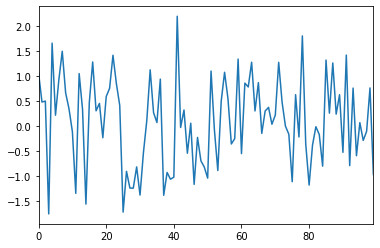

In [5]:
df.Stationary.plot()

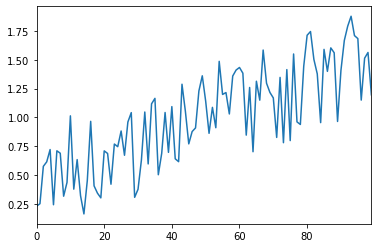

In [6]:
df.Nonstationary.plot()

In [7]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-9.13476052299967,
 2.9561660731739018e-15,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 221.50025210053576)

In [8]:
adfuller(df.Nonstationary)

(-0.3752951377506495,
 0.9141426083669688,
 10,
 89,
 {'1%': -3.506057133647011,
  '5%': -2.8946066061911946,
  '10%': -2.5844100201994697},
 31.41663065962061)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [9]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [10]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

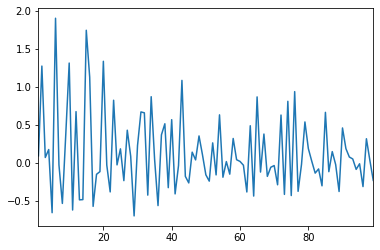

In [11]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [12]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [13]:
# Drop the NaNs created from the diff function
df = df.dropna()

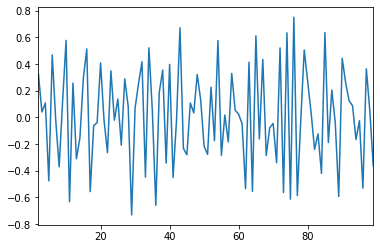

In [14]:
# Plot the 
df.Diff.plot()

In [15]:
adfuller(df.Diff)

(-5.200558363557702,
 8.769035512367517e-06,
 9,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 27.29123926850849)

In [16]:
adfuller(df.Returns)

(-9.04255935963553,
 5.087040292436707e-15,
 2,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 97.62978067820674)